# STATISTICS AND A/B TESTING

In [46]:
# import library

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statistics as stat

In [47]:
# import data no 1 - 4

data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
np.sort(data['YrSold'].unique())

array([2006, 2007, 2008, 2009, 2010], dtype=int64)

## Descriptive statistical analysis

### Problem 1

Tunjukkan statistika deskriptif untuk variabel harga rumah 

In [49]:
# ukuran pemusatan

mean = data['SalePrice'].mean()
median = data['SalePrice'].median()
modus = stat.mode(data['SalePrice'])
q1 = data['SalePrice'].quantile(0.25)
q3 = data['SalePrice'].quantile(0.75)

print('Mean =', mean)
print('Median =', median)
print('Modus =', modus)
print('Q1 =', q1)
print('Q3 =', q3)

Mean = 180921.19589041095
Median = 163000.0
Modus = 140000
Q1 = 129975.0
Q3 = 214000.0


Harga rata-rata penjualan rumah dari tahun 2016 hingga tahun 2010 adalah 180921.19, dengan rumah terjual paling banyak ada di harga 140000 dan titik tengah atau median dari harga penjualan rumah berada di harga 163000.0

Untuk nilai kuartil 1 adalah 129975.0 yang berarti 25% data harag penjualan rumah berada di bawah 129975.0 dan 75% data sisanya berada di atas 129975.0. Untuk nilai kuartil 3 adalah 214000.0 yang berarti 25% data rumah terjual di atas harga 214000.0 dan 75% data sisanya di bawah 214000.0

In [50]:
# ukuran penyebaran

jangkauan = data['SalePrice'].max() - data['SalePrice'].min()
var = data['SalePrice'].var()
std = data['SalePrice'].std()
iqr = q3 - q1

print('Range/Jangkauan =', jangkauan)
print('Variance =', var)
print('Standard Deviation =', std)
print('Interquartile =', jangkauan)

Range/Jangkauan = 720100
Variance = 6311111264.297451
Standard Deviation = 79442.50288288663
Interquartile = 720100


Untuk jangkauan harga penjualan rumah dari tahun 2006 sampai 2010 berada di 720100. Jika melihat nilai variance dan standard deviasinya yaitu 6311111264.29 dan 79442.502 maka dapat dikatakan bahwa penyebaran data harga penjualan rumah ini cukup jauh dari rata-ratanya atau data cukup menyebar tidak berada di sekitar rata-ratanya. Dari nilai jangkauan yang besar pun hal ini cukup terlihat bahwa data memang sangat menyebar. 

Dari hasil ukuran penyebaran data terlihat pula bahwa range/jangkauan data sama dengan jangkauan antarkuartilnya (interquartile) yang berarti penyebaran atau distribusi data relatif simetris

### Problem 2

Tunjukkan statistika deskriptif untuk variabel harga rumah setiap tahunnya

In [51]:
# mendefinisikan fungsi q1, q3, modus, range, interquartile

def quartile1(x):
    return x.quantile(0.25)

def quartile3(x):
    return x.quantile(0.75)

def modus(x):
    return stat.mode(x)

def jangkauan(x):
    return x.max() - x.min()

def iqr(x):
    return quartile3(x) - quartile1(x)

In [52]:
# melakukan agregasi untuk mendapatkan ukuran penyebaran dan pemusatan pertahun
agg = {'SalePrice' : ['mean', 'median', modus, quartile1, quartile3, jangkauan, 'var', 'std', iqr]}
data_tahun = data[['YrSold', 'SalePrice']].groupby('YrSold').agg(agg).reset_index()
data_tahun.columns = ['Year', 'Mean', 'Median', 'Modus', 'Q1', 'Q3', 'Range', 'Variance', 'Standard Deviation', 'Interquartile']
data_tahun

,Year,Mean,Median,Modus,Q1,Q3,Range,Variance,Standard Deviation,Interquartile
0,2006,182549.458599,163995.0,140000,131375.0,218782.5,589689,6.308623e+09,79426.838855,87407.5
1,2007,186063.151976,167000.0,144000,129900.0,219500.0,715700,7.356179e+09,85768.171410,89600.0
2,2008,177360.838816,164000.0,140000,131250.0,207000.0,406261,4.863055e+09,69735.610685,75750.0
3,2009,179432.103550,162000.0,110000,125250.0,212750.0,548033,6.541451e+09,80879.237311,87500.0
4,2010,177393.674286,155000.0,140000,128100.0,213250.0,556657,6.472408e+09,80451.280085,85150.0


- Rata-rata harga setiap tahunnya mengalami perubahan. Tahun 2006 dan 2007 perubahan yang dialami cenderung tidak terlalu besar, begitupun antara tahun 2008 hingga 2010 yang perubahannya tidak terlalu besar. Terjadi perubahan harga yang cukup terlihat yaitu antara tahun 2006-2007 dan 2008-2010
- Median dari data tiap tahunnya relatif mirip kecuali pada tahun 2010 yang cukup berbeda dibandingkan dengan tahun lainnya dimana pada tahun 2010 itu mediannya lebih kecil
- Untuk modus atau harga rumah terjual paling banyak itu setiap tahunnya relatif sama dan nilai ini sama dengan modus untuk keseluruhan data (jawaban no 1) kecuali pada tahun 2009 yang cukup berbeda
- Nilai Q1 dan Q3 setiap tahunnya relatif sama dengan perbedaan yang tidak begitu besar
- Jangkauan data dari masing-masing tahun cukup beragam
- Nilai variance dan stnadar deviasi setiap tahunnya hampir sama dan nilainya cukup besar sehingga dapat dikatakan bahwa penyebaran data di setiap tahunnya cukup menyebar dan jauh dari nilai rata-ratanya
- Berbeda dengan jangkauan, nilai interquartile di setiap tahunnya ini relatif sama

### Problem 3

Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot 
tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk 
analisa apakah lebih baik menggunakan mean atau menggunakan 
median?

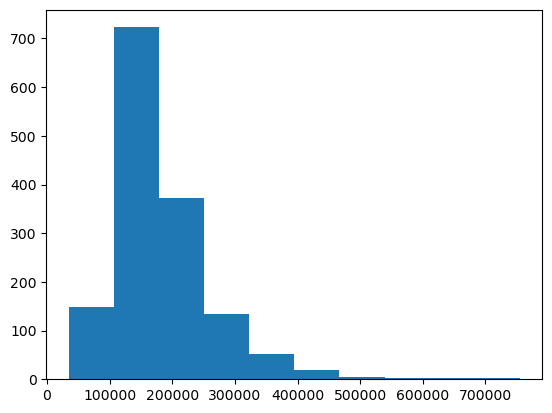

In [53]:
# histogram kolom SalePrice

plt.hist(data['SalePrice'])
plt.show()

Distribusi harga rumah cenderung membentuk distribusi yang **positively skewed**. Pada bentuk distribusi ini modus berada pada harga yang relatif rendah dan jika ada outlier itu berada di harga yang tinggi sekali. Pada distribusi ini nilai median lebih kecil dibandingkan rata-ratanya. Untuk membuktikan hal ini di bagian selanjutnya akan dihitung nilai median dan rata-ratanya

In [54]:
# mendapatkan mean dan median data

x = data['SalePrice']

print('Mean :', x.mean())
print('Median :', x.median())

Mean : 180921.19589041095
Median : 163000.0


Terbukti memang nilai median lebih kecil dari nilai rata-ratanya

Untuk analisa data yang memiliki distribusi positively skewed ini lebih cocok menggunakan median dibandingkan dengan rata-rata. Karena distribusi ini memiliki ekor yang lebih panjang di sebelah kanan dan data lebih banyak terpusat di sebelah kiri maka akan menyebabkan nilai rata-rata lebih terpengaruh oleh outlier yang akan muncul di bagian ekor. Berbeda dengan median yang memang cukup robust atau tidak terpengaruh oleh outlier sehingga lebih menggambarkan ukuran pusat data

### Problem 4

Buktikan pernyataan bahwa **setiap tahunnya harga 
rumah itu pasti naik**

**Menentukan hipotesis**
- H0 : Rata-rata harga rumah setiap tahunnya relatif sama dan tidak ada perbedaan
- H1 : Rata-rata harga rumah setiap tahunnya berbeda (harga mengalami perubahan)

In [55]:
# menghitung harga rata-rata rumah tiap tahun

data_mean = data.groupby('YrSold')['SalePrice'].mean()
data_mean

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

Jika melihat harga rata-rata rumah setiap tahunnya dari data di atas maka ada yang mengalami perubahan dan ada pula yang cenderung tidak berubah harganya

In [56]:
# membagi data untuk setiap tahun

year_2006 = data[data['YrSold'] == 2006]
year_2007 = data[data['YrSold'] == 2007]
year_2008 = data[data['YrSold'] == 2008]
year_2009 = data[data['YrSold'] == 2009]
year_2010 = data[data['YrSold'] == 2010]

In [57]:
# pengujian dengan metode anova

anova_test = st.f_oneway(year_2006['SalePrice'],
                         year_2007['SalePrice'],
                         year_2008['SalePrice'],
                         year_2009['SalePrice'],
                         year_2010['SalePrice'])

In [58]:
# hasil pengujian hipotesis

pvalue = anova_test.pvalue 

print('p-value =', pvalue)

if pvalue >= 0.05:
  print('Tidak cukup bukti untuk mengatakan bahwa rata-rata harga rumah setiap tahunnya berbeda')
else:
  print('Cukup bukti untuk mengatakan bahwa rata-rata harga rumah setiap tahunnya berbeda')

p-value = 0.6300887663573457
Tidak cukup bukti untuk mengatakan bahwa rata-rata harga rumah setiap tahunnya berbeda


Dari hasil pengujian hipotesis yang dilakukan, didapatkan bahwa tidak cukup bukti untuk mengatakan bahwa rata-rata harga rumah setiap tahunnya itu berbeda. Pernyataan bahwa setiap tahunnya harga rumah pasti naik itu tidak terbukti karena pada kenyataannya rata-rata harga setiap rumah cenderung sama. Perbedaan yang terjadi tidak cukup signifikan untuk mengatakan adanya perubahan harga

## A/B Testing

Menganalisa hasil ab-testing suatu perusahaan bank. Apakah 
jumlah campaign mampu meningkatkan keinginan user untuk 
membuka akun deposit atau tidak?

In [59]:
# read dataset

df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


- **Nama experiment** : A/B testing pengaruh jumlah campaign terhadap keputusan membuka akun deposit

- **Hipotesis** : Semakin banyak jumlah campaign maka akan semakin meningkatkan keinginan user untuk membuka akun deposit

- **Participant** : Nasabah bank yang menerima campaign

- **Variabel yang akan diuji** : Jumlah campaign (campaign) dan keputusan user akhirnya membuka akun deposit atau tidak (y)

**Metrics yang digunakan**
- Macroconversions : Banyaknya user yang membuka akun deposit setelah menerima campaign
- Microconversions : menolak campaign
- Vanity metrics : Jenis campaign yang diberikan, banyaknya campaign yang disebar 

**Sample size**

In [60]:
# mencari ukuran sampel dengan rumus slovin

N = df.shape[0]
e = 0.05
n = N / (1+N*e**2)

print('Berdasarkan rumus slovin, didapat ukuran sample sebesar', n)

Berdasarkan rumus slovin, didapat ukuran sample sebesar 396.4920742803271


**Penentuan Hipotesis**
- H0 : Jumlah campaign tidak memengaruhi user untuk membuka akun deposit
- H1 : Jumlah campaign memengaruhi user untuk membuka akun deposit

In [62]:
# memisahkan data untuk yang membuka akun deposit dan tidak

open_deposit = df[df['y'] == 'yes']
not_open_deposit = df[df['y'] == 'no']

In [63]:
# pengujian dengan Mann-Whitney U test

mannwhitneyu_test = st.mannwhitneyu(open_deposit['campaign'],
                                    not_open_deposit['campaign'])
mannwhitneyu_test

MannwhitneyuResult(statistic=90300543.5, pvalue=1.9484904873905108e-71)

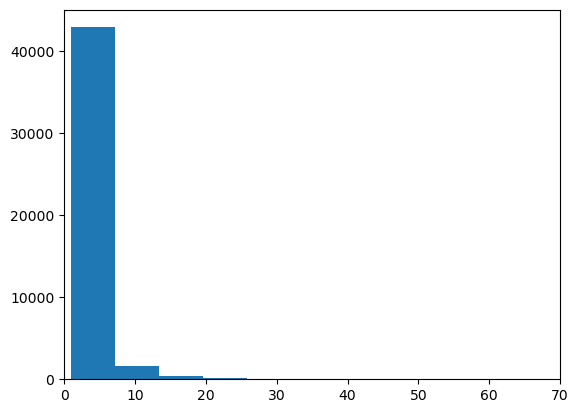

In [64]:
# histogram kolom campaign

plt.hist(df['campaign'])
plt.xlim(0,70)
plt.show()

Dari histogram di atas terlihat distribusi jumlah campaign itu cenderung positively skewed dengan data banyak berpusat di sebelah kiri

In [65]:
# menghitung rata-rata campaign yang diterima untuk setiap keputusan membuat akun deposit atau tidak

df_mean = df.groupby('y')['campaign'].mean()
df_mean

y
no     2.846350
yes    2.141047
Name: campaign, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

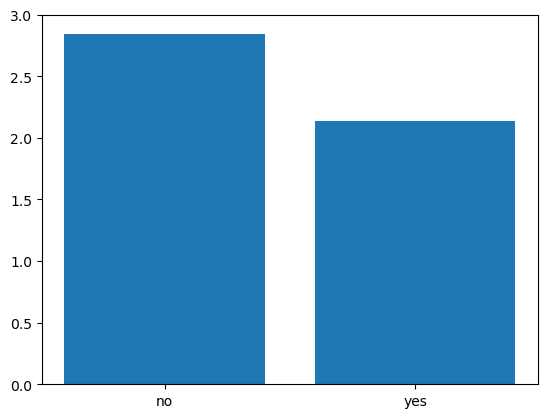

In [66]:
# melakukan visualisasi rata-rata campaign yang diterima untuk setiap kelompok keputusan

x = ['no','yes']
y = df_mean

plt.bar(x,y)
plt.ylim(0,3)
plt.show

Jika melihat nilai rata-rata di atas, memang terdapat perbedaan rata-rata jumlah campaign yang diterima user antara kelompok yang akhirnya membuka akun deposit dan yang tidak. Perbedaan tersebut sebesar **0.7**. Perbedaannya cukup kecil, namun untuk melihat apakah perbedaan ini signifikan dalam memengaruhi keputusan user dalam membuka akkun deposit akan dilakukan pengujian hipotesis lebih lenjut secara statistik

In [67]:
# mengecek pvalue dan batas error untuk mengambil keputusan
p_value = mannwhitneyu_test.pvalue 

print('p-value =',p_value)

if p_value >= 0.05:
  print('Tidak cukup bukti untuk menyatakan bahwa jumlah campaign memengaruhi keputusan nasabah untuk membuka akun deposit')
else:
  print('Cukup bukti untuk menyatakan bahwa jumlah campaign memengaruhi keputusan nasabah untuk membuka akun deposit')

p-value = 1.9484904873905108e-71
Cukup bukti untuk menyatakan bahwa jumlah campaign memengaruhi keputusan nasabah untuk membuka akun deposit


Dari hasil pengujian hipotesis yang dilakukan, didapatkan bahwa cukup bukti untuk mengatakan jumlah campaign memengaruhi keputusan user dalam membuka akun deposit. Pernyataan bahwa jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit itu terbukti. Semakin banyak user menerima campaign maka semakin besar kemungkinan user tersebut untuk membuka akun deposit